<a href="https://colab.research.google.com/github/milanajudiya/Appliances_Energy_Prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_application_energy.csv")

In [43]:
df.shape

(19735, 29)

## Data Preprocessing

In [44]:
pd.set_option('display.max_columns', None)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [45]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [47]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [48]:
# make copy of original dataset

df_energy=df.copy()

In [49]:
df_lights=pd.DataFrame(["T1","T2","T3","T4","T5","T6","T7","T8","T9","T_out"])
df_lights

,0
0,T1
1,T2
2,T3
3,T4
4,T5
5,T6
6,T7
7,T8
8,T9
9,T_out


In [50]:
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [51]:
# convert date column into datetime datatype

df_energy["date"]=pd.to_datetime(df_energy["date"])

In [52]:
# extract weekday from date column

df_energy["weekday"]=df_energy["date"].dt.weekday

In [53]:
# extract month from date column

df_energy["month"]=df_energy["date"].dt.month

In [54]:
df_energy["lights"].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

Most values is '0' in lights column so drop this column

In [55]:
df_energy.drop(["lights","date"],axis=1,inplace=True)

In [56]:
df_energy.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,1
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,1
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,1
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,1
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,1


In [57]:
df_energy.tail()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,4,5
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,4,5
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,4,5
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,4,5
19734,430,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,4,5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


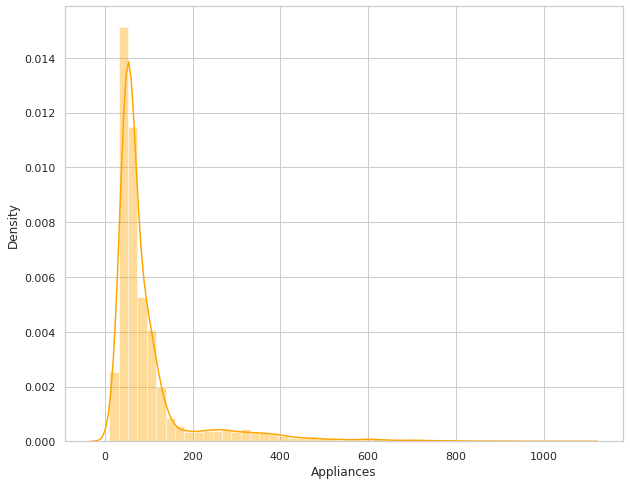

In [58]:
# graph of Dependent variable

plt.figure(figsize=(10,8))
sns.distplot(df_energy["Appliances"],color="orange")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


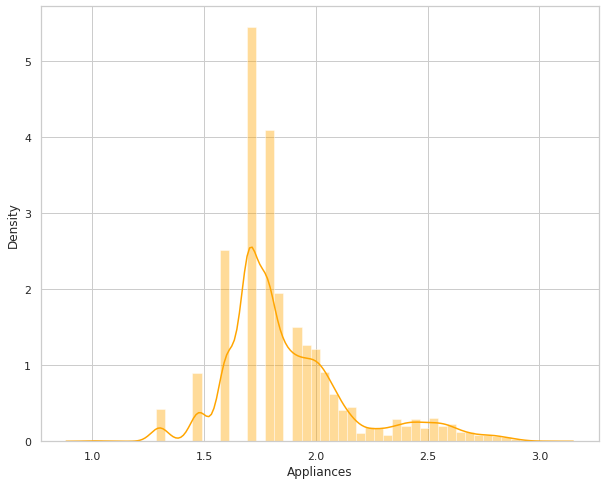

In [59]:
# apply log transformation 

plt.figure(figsize=(10,8))
sns.distplot(np.log10(df_energy["Appliances"]),color="orange")

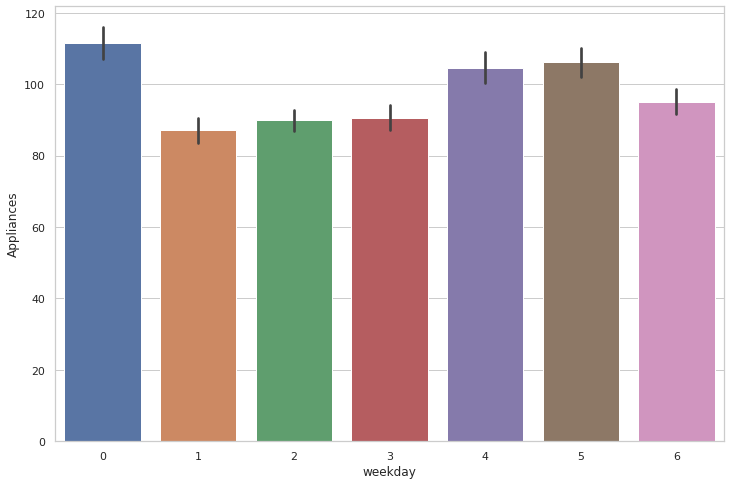

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x="weekday",y="Appliances",data=df_energy)

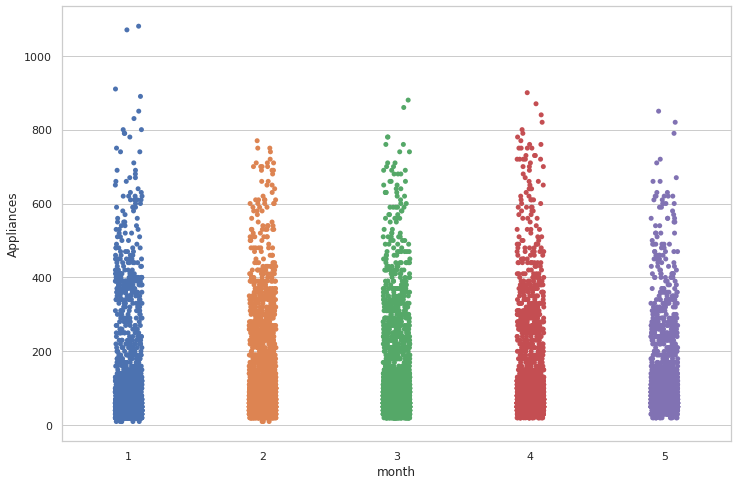

In [61]:
plt.figure(figsize=(12,8))
sns.stripplot(x="month",y="Appliances",data=df_energy)

In [62]:
df_energy["Appliances"].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64

In [63]:
df_energy["Appliances"].mean()

97.6949581960983

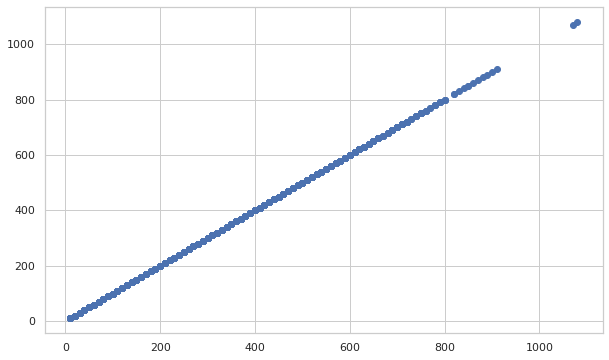

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x="Appliances",y="Appliances",data=df_energy)

In [65]:
df_energy["Appliances"].max()

1080

There is two outlier in Dependent Variable(Applicances), Removing two outliers from 'Appliances'

In [66]:
df_energy.drop(df_energy[df_energy["Appliances"]==1080].index,inplace=True)

In [67]:
df_energy["Appliances"].max()

1070

In [68]:
df_energy.drop(df_energy[df_energy["Appliances"]==1070].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

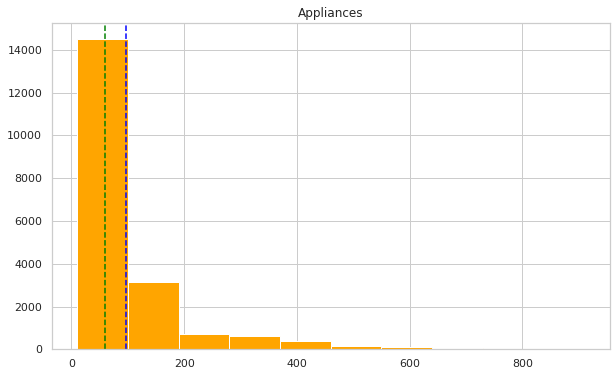

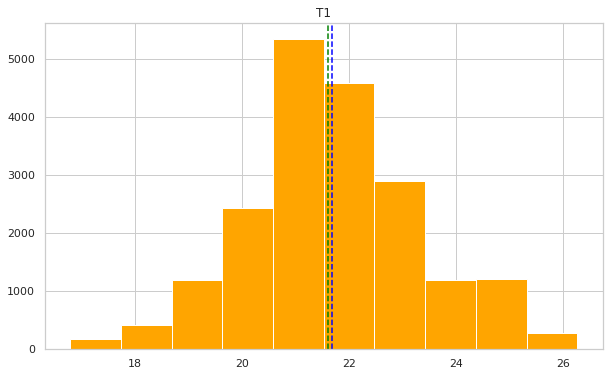

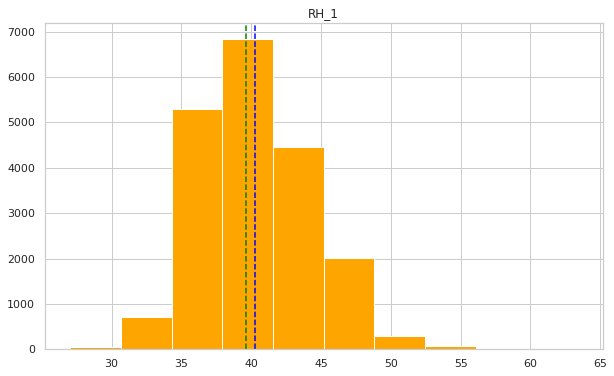

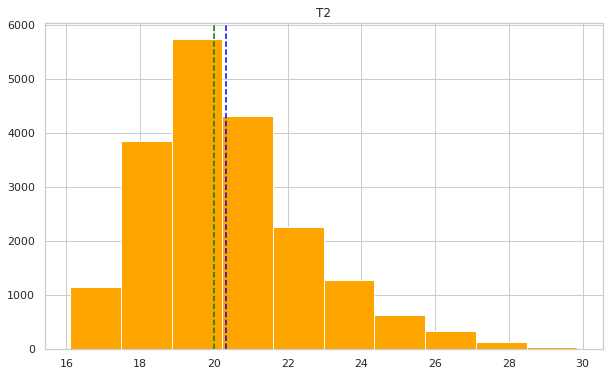

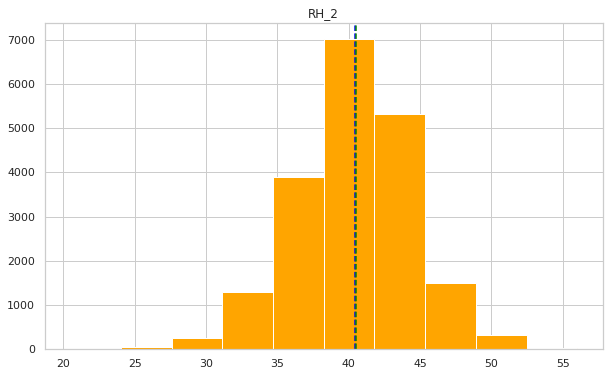

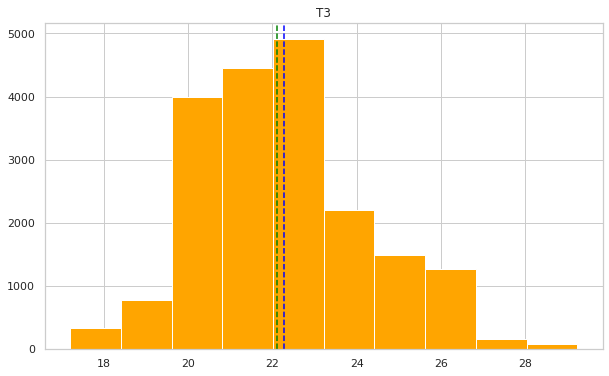

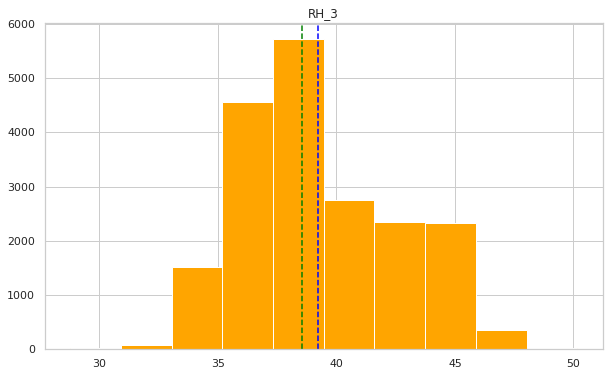

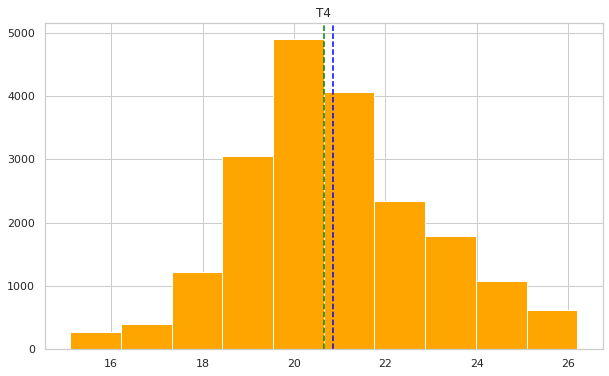

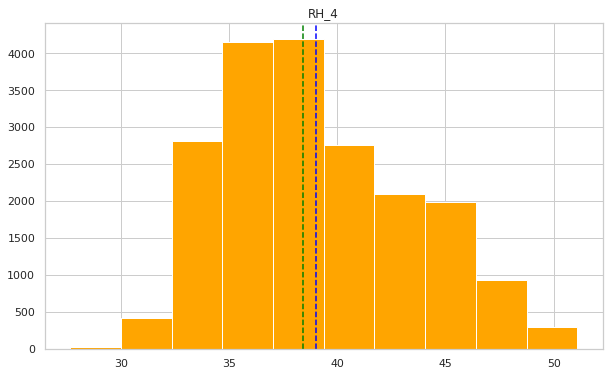

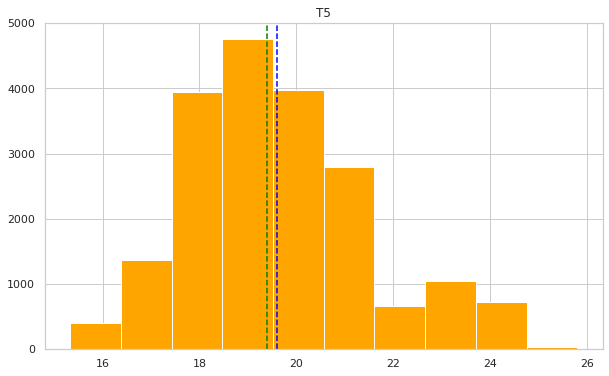

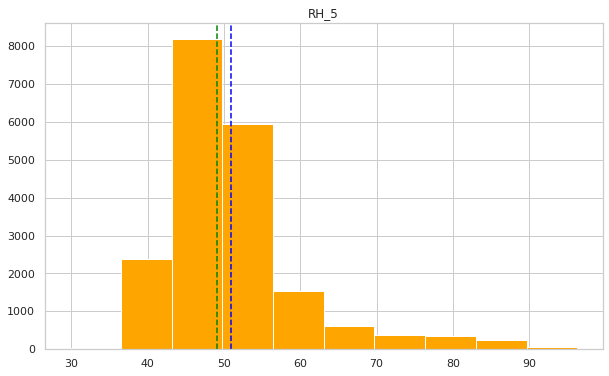

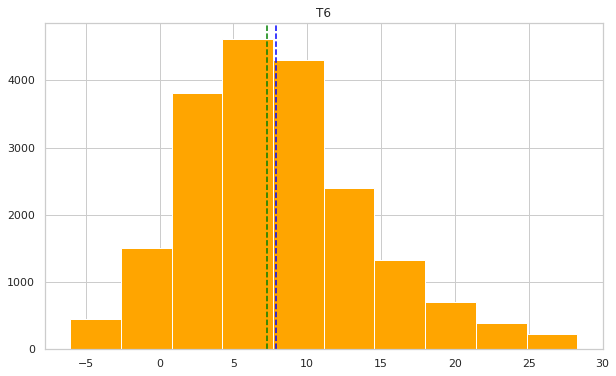

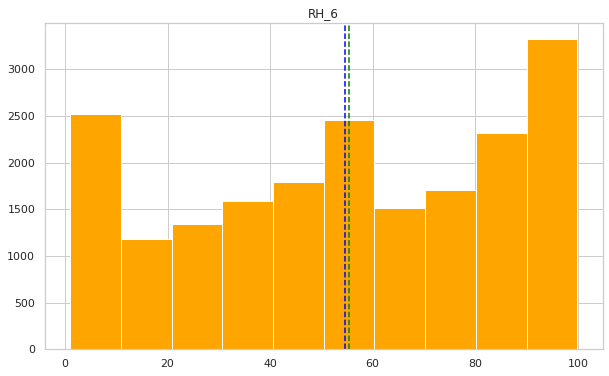

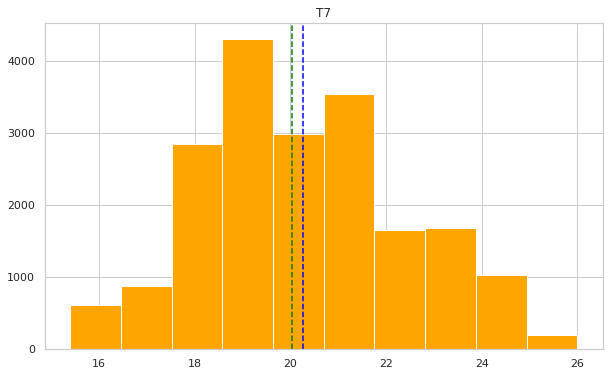

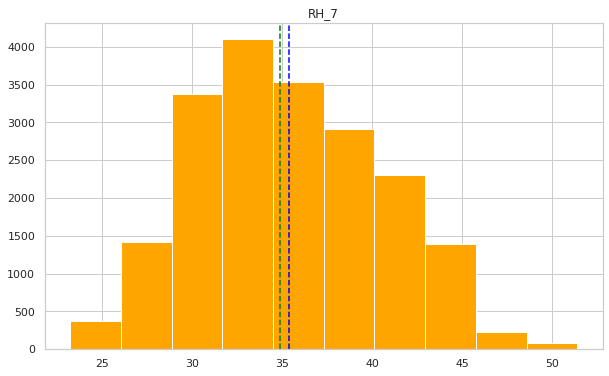

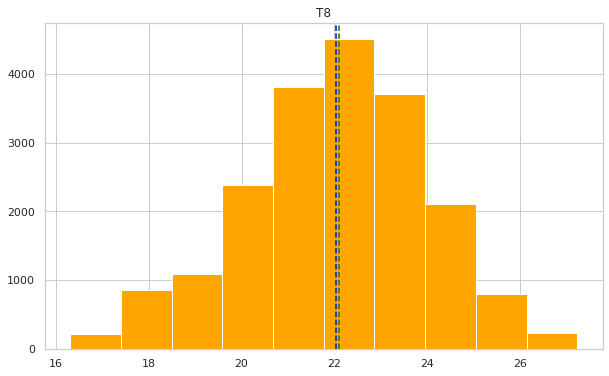

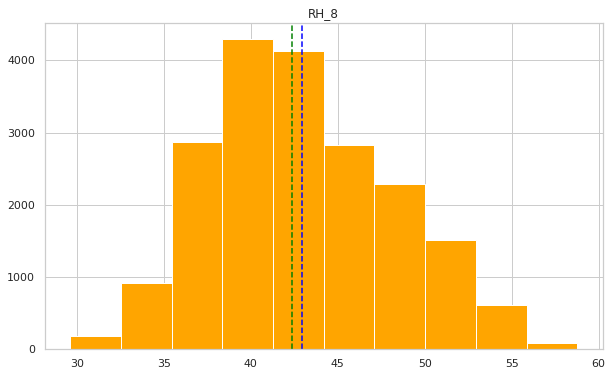

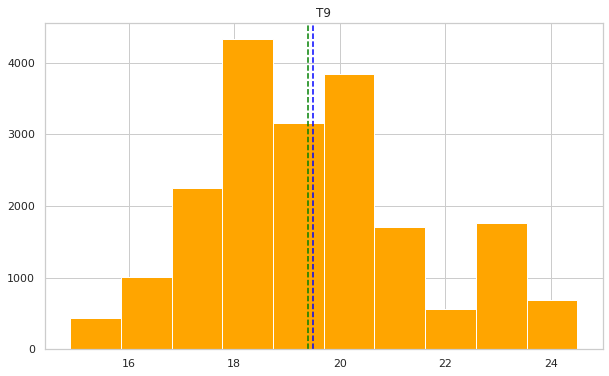

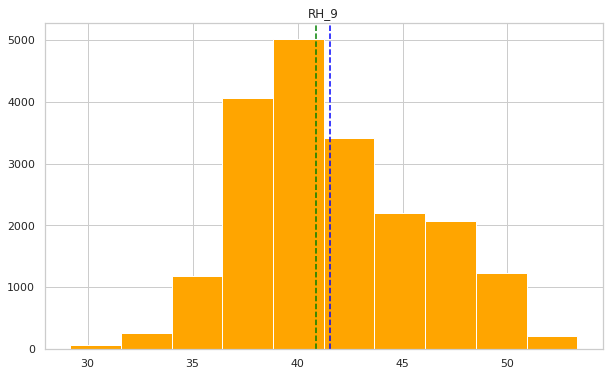

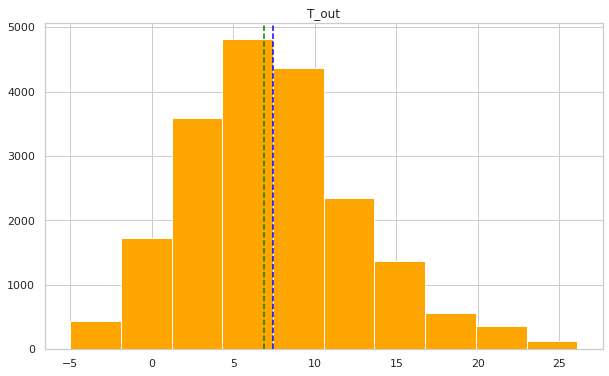

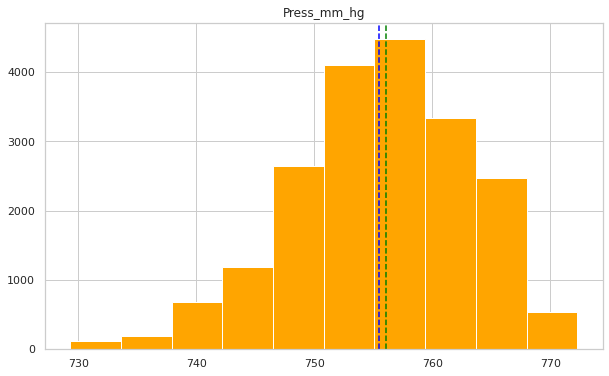

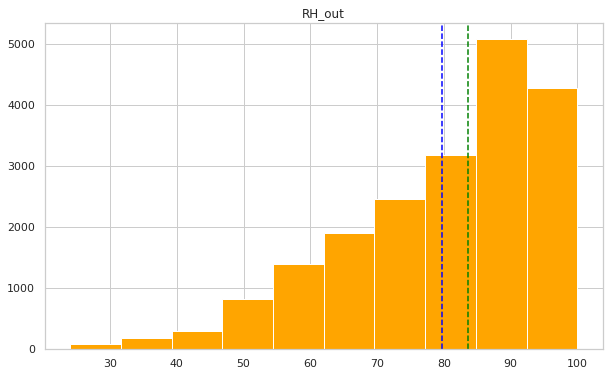

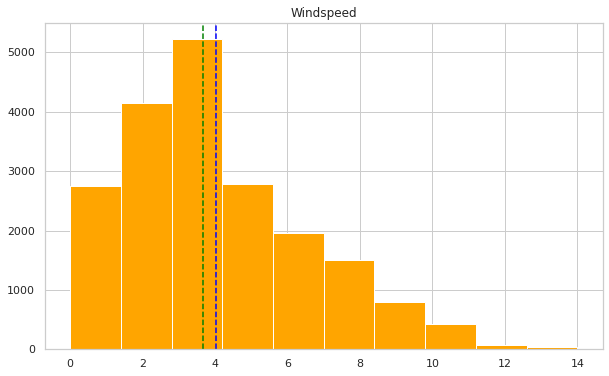

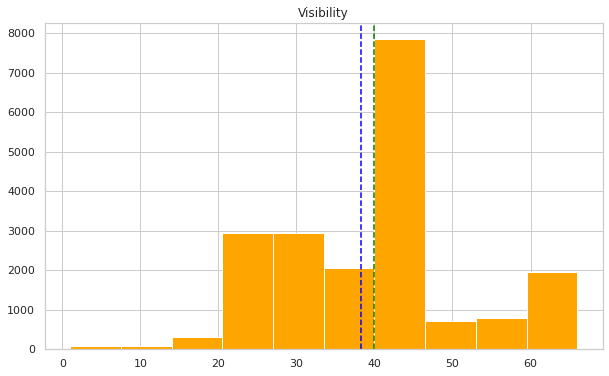

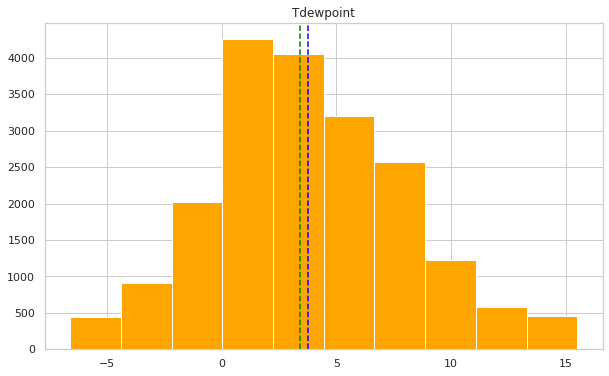

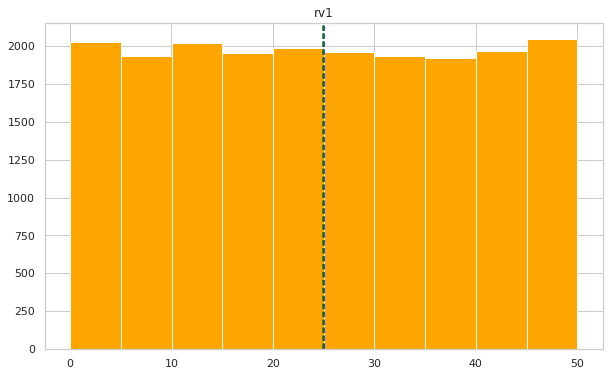

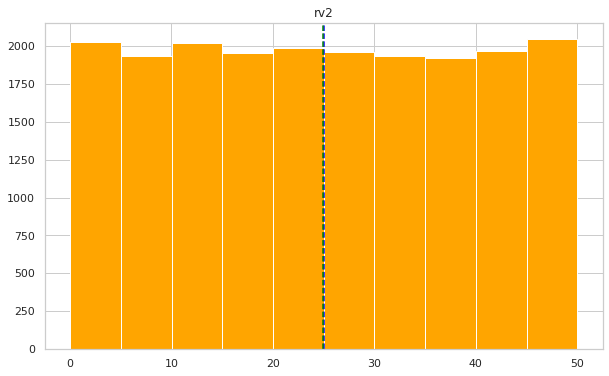

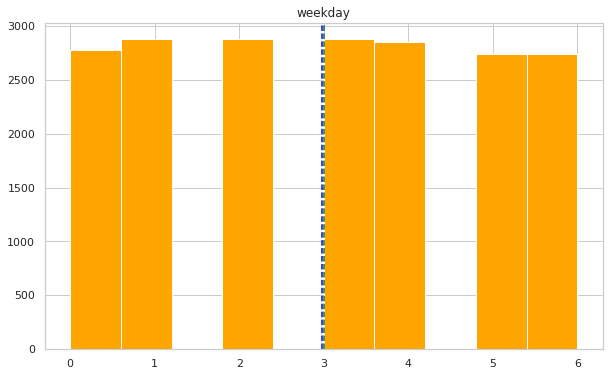

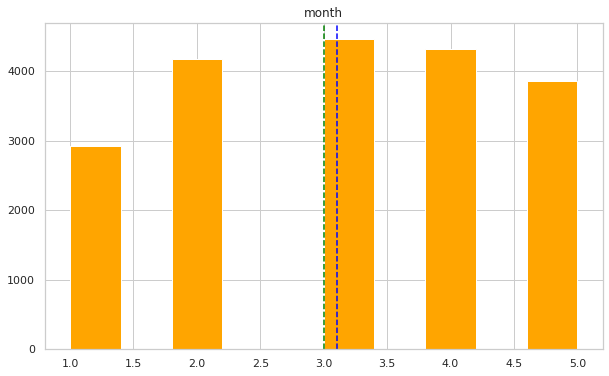

In [69]:
for col in df_energy:
  figure = plt.figure(figsize=(10,6))
  current_axis = figure.gca()
  feature=df_energy[col]
  feature.hist(ax=current_axis,color="orange")
  current_axis.axvline(feature.mean(),color="blue",linestyle="--")
  current_axis.axvline(feature.median(),color="green",linestyle="--")
  current_axis.set_title(col)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


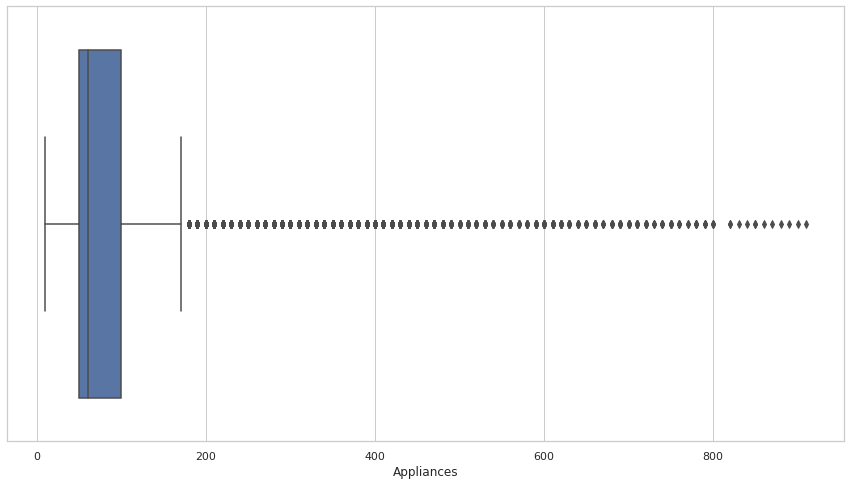

In [70]:

sns.set(style='whitegrid')
figure = plt.figure(figsize=(15,8))
sns.boxplot(df_energy["Appliances"])

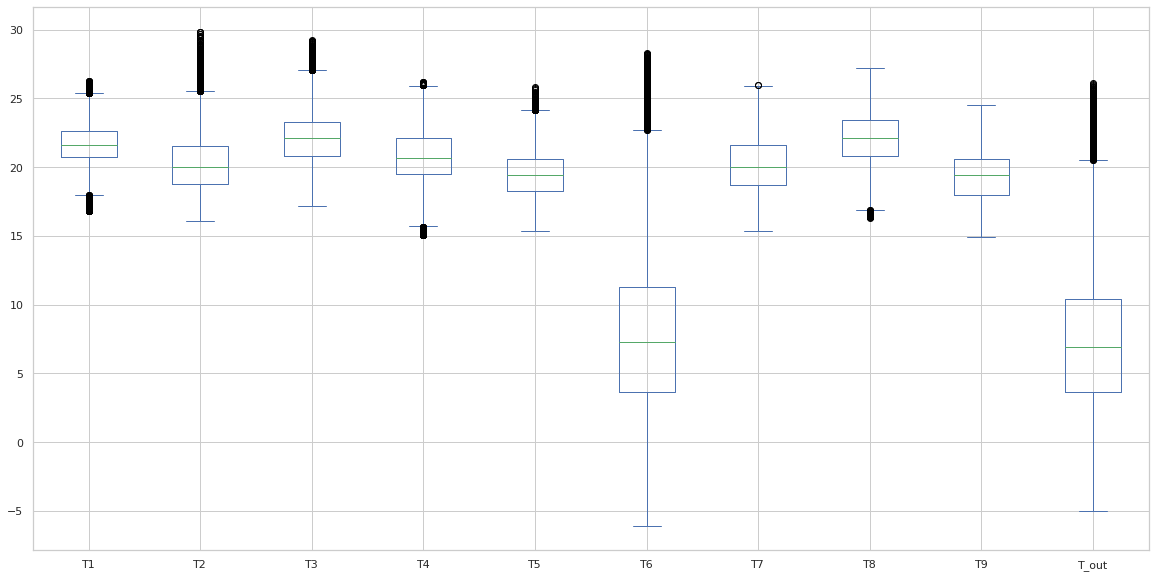

In [71]:
df1=pd.DataFrame(data=df_energy,columns=["T1","T2","T3","T4","T5","T6","T7","T8","T9","T_out"])
df1.plot(kind="box",figsize=(20,10))

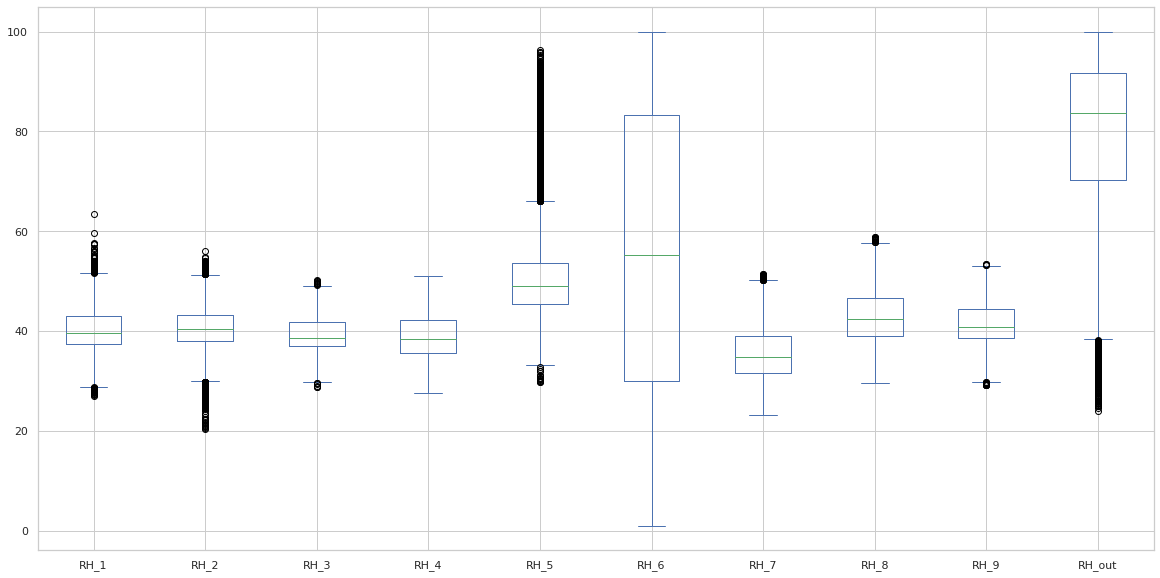

In [72]:
df2=pd.DataFrame(data=df_energy,columns=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","RH_out"])
df2.plot(kind="box",figsize=(20,10))

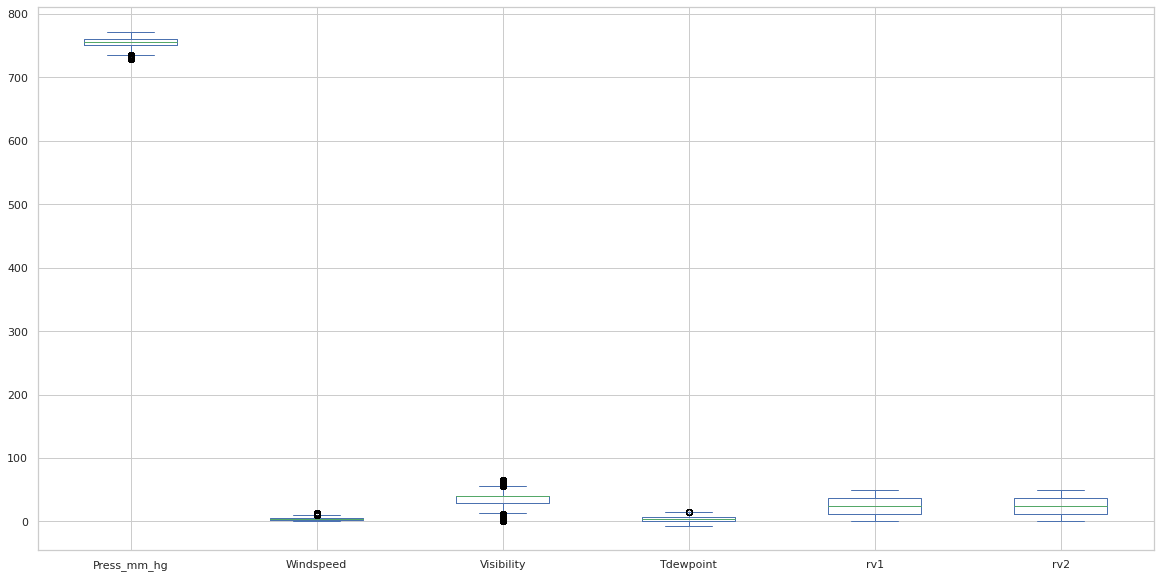

In [73]:
df3=pd.DataFrame(data=df_energy,columns=["Press_mm_hg","Windspeed","Visibility","Tdewpoint","rv1","rv2"])
df3.plot(kind="box",figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

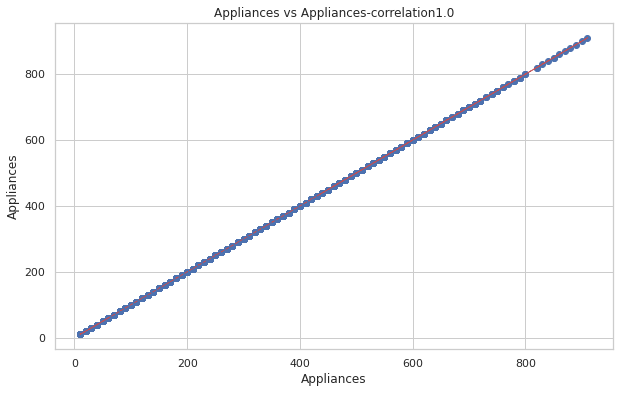

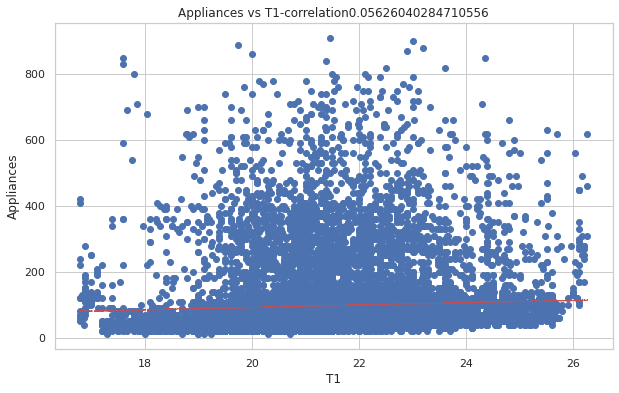

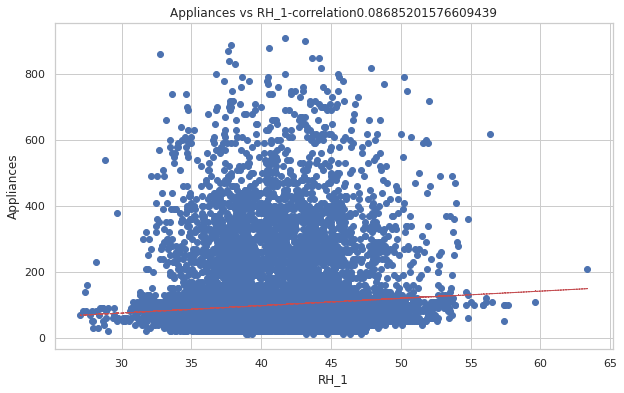

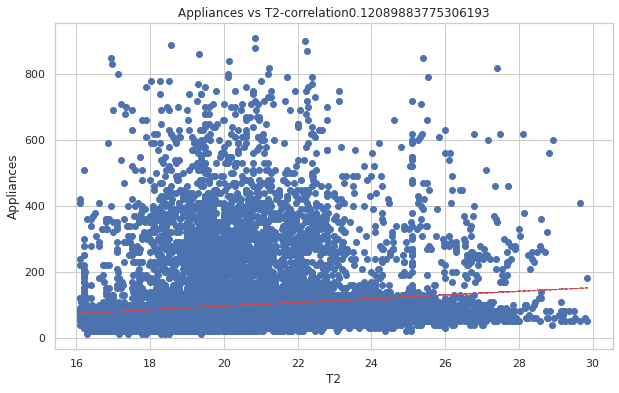

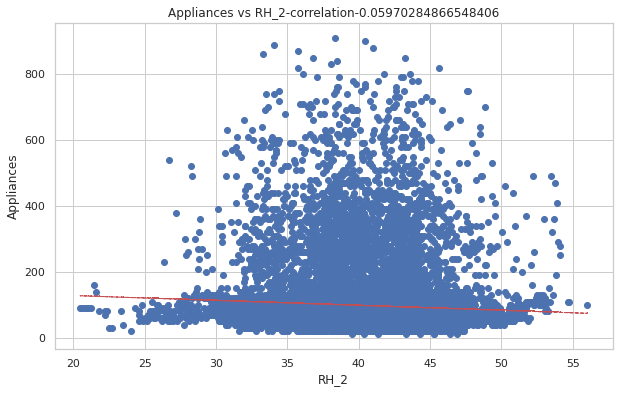

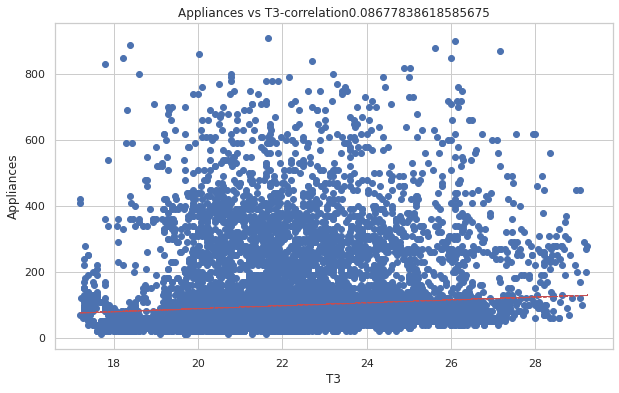

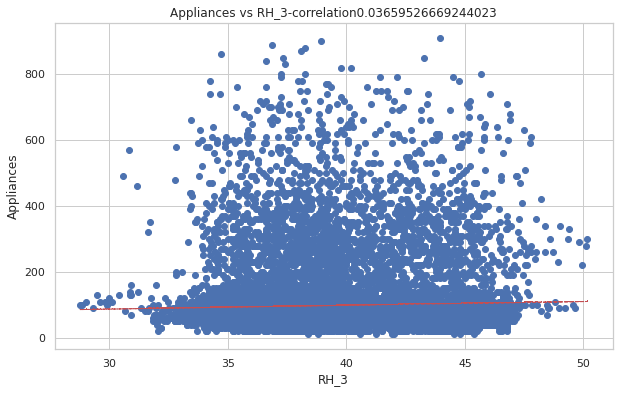

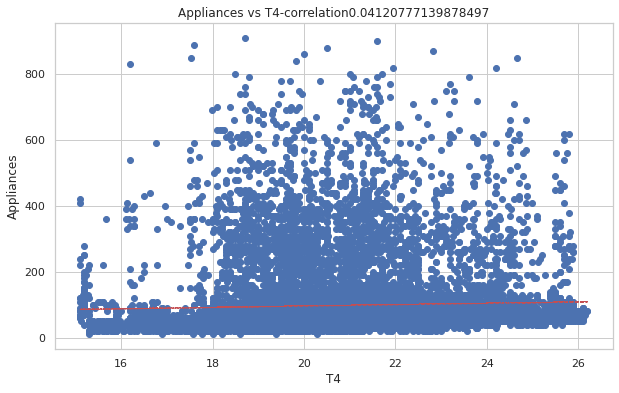

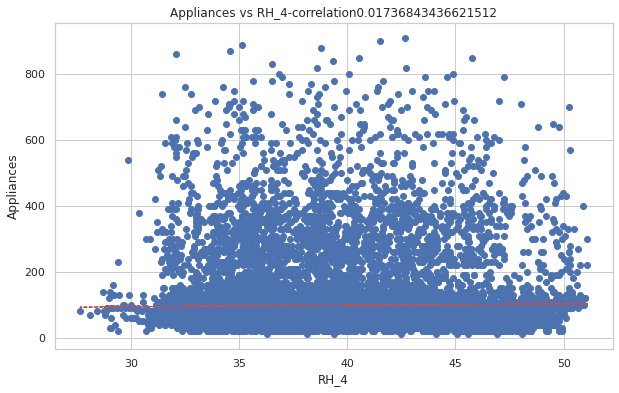

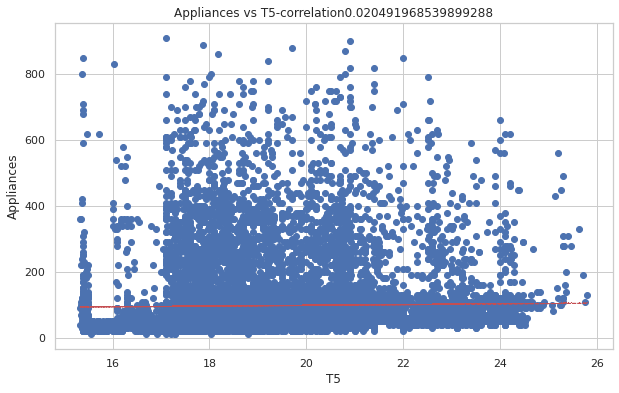

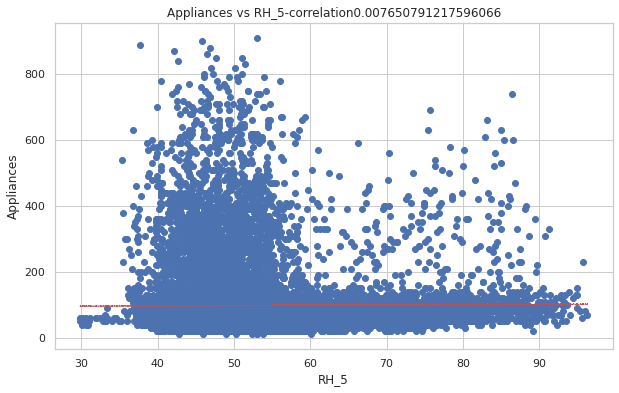

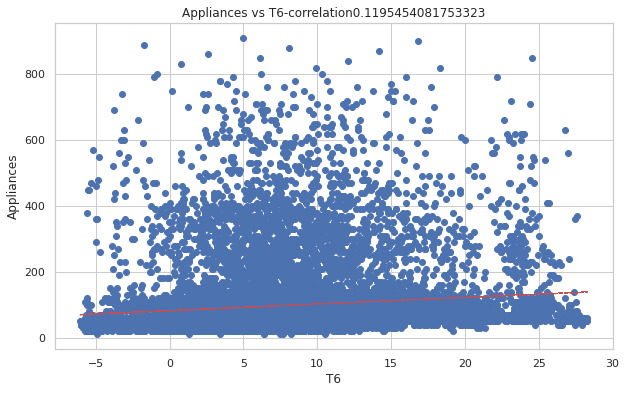

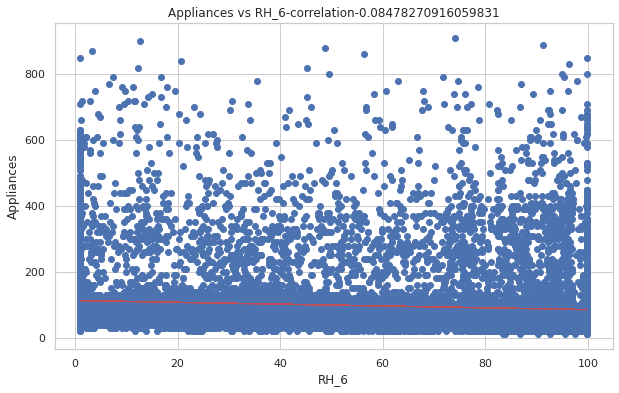

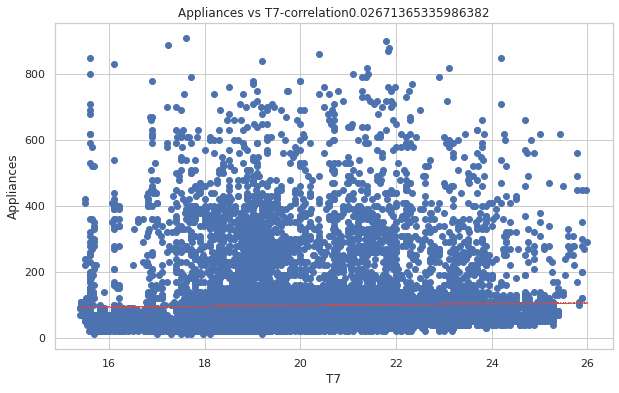

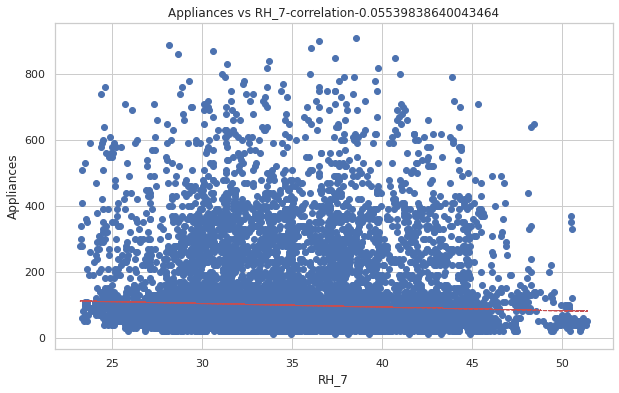

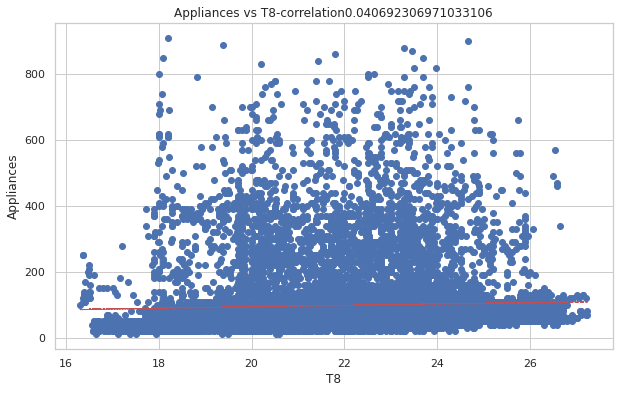

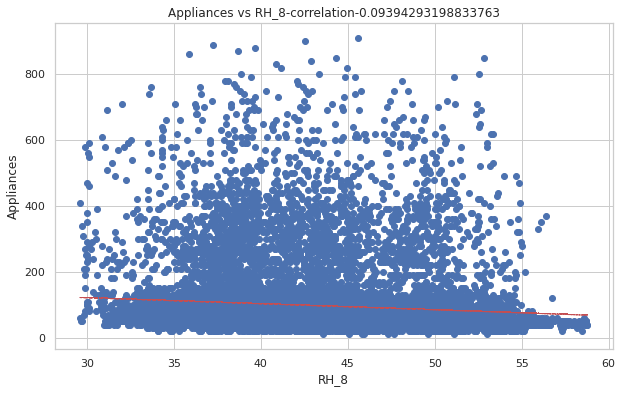

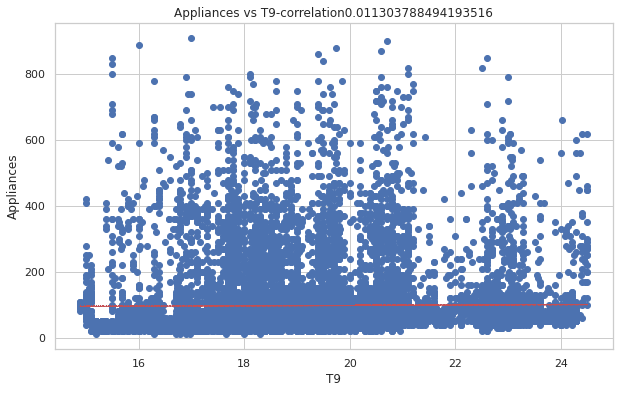

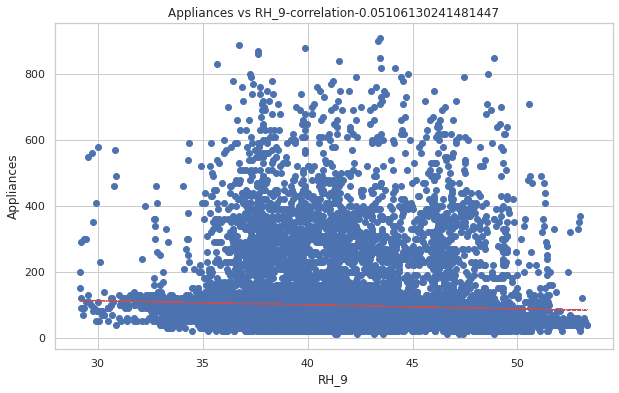

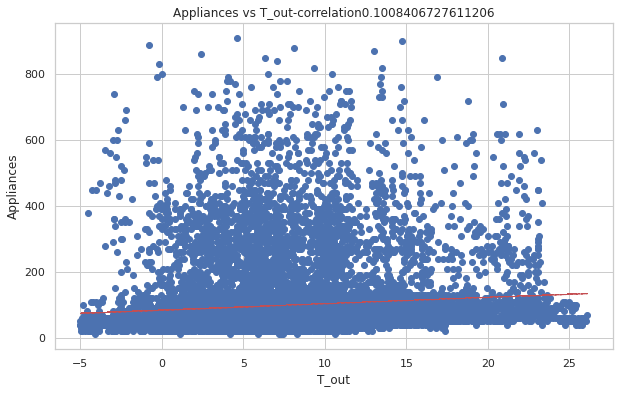

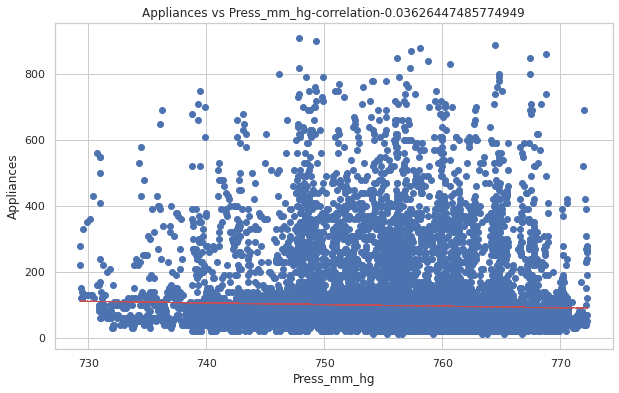

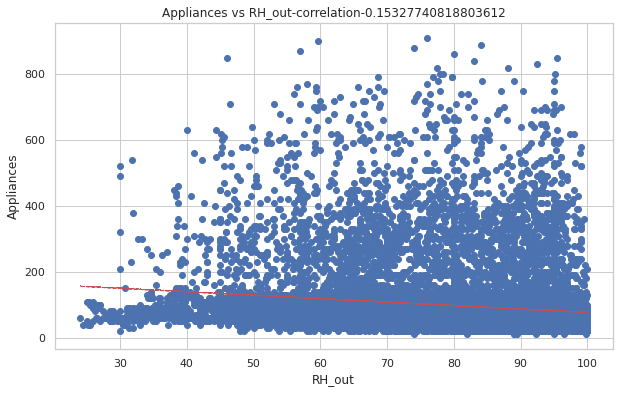

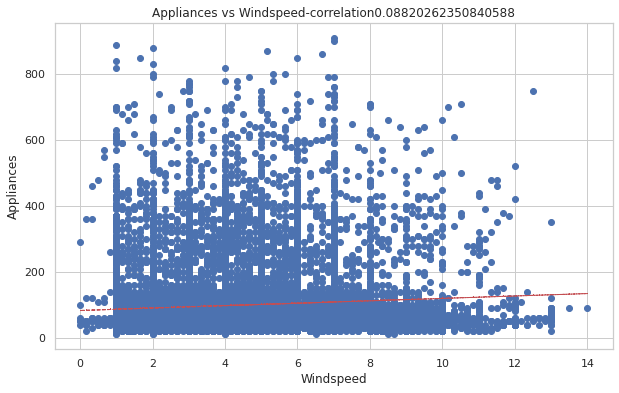

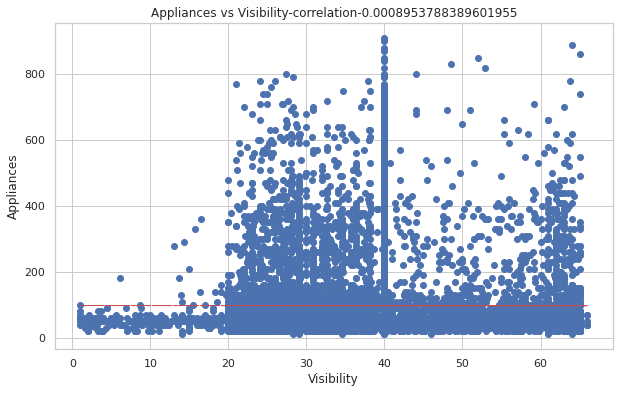

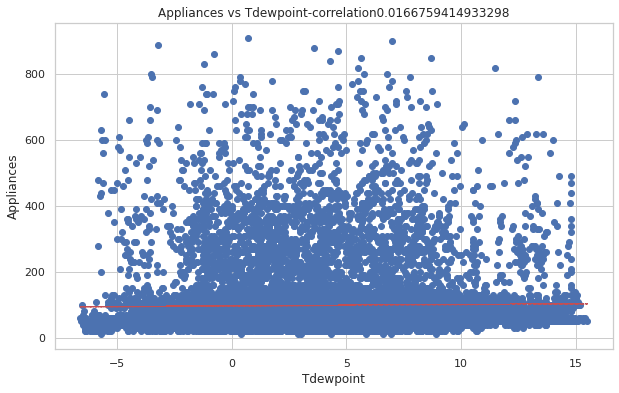

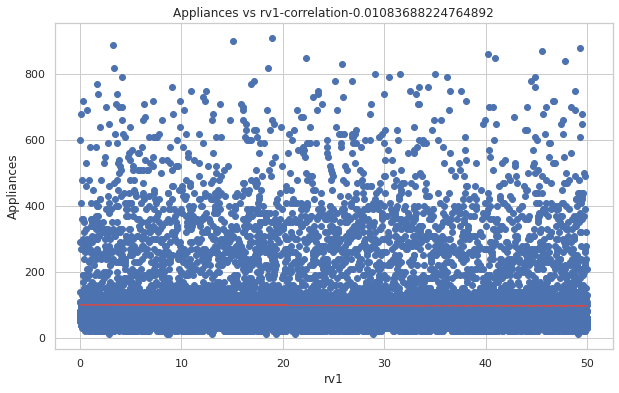

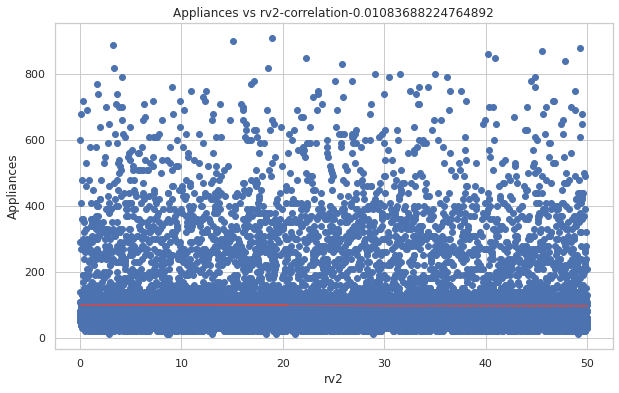

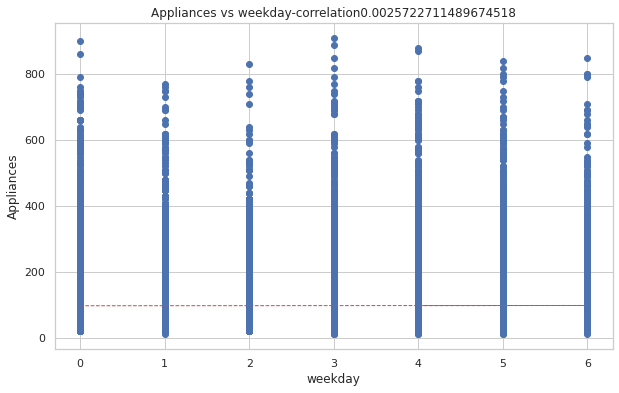

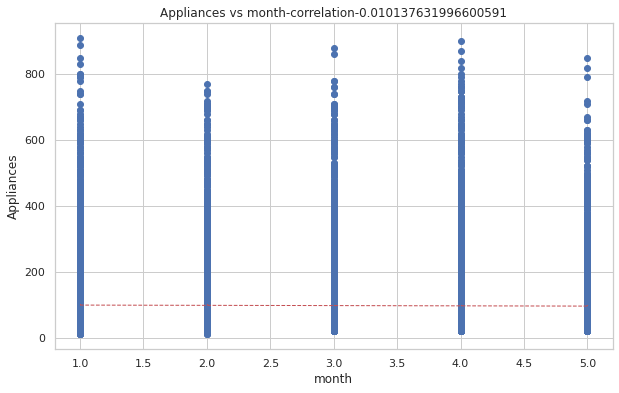

In [74]:
for col in df_energy:
  figure = plt.figure(figsize=(10,6))
  current_axis = figure.gca()
  feature=df_energy[col]
  label=df_energy["Appliances"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel("Appliances")
  current_axis.set_title("Appliances vs" + " "+col+"-correlation"+str(correlation))
  z=np.polyfit(df_energy[col],df_energy["Appliances"],1)
  y=np.poly1d(z)(df_energy[col])
  plt.plot(df_energy[col],y,"r--,",lw=1)
plt.show()

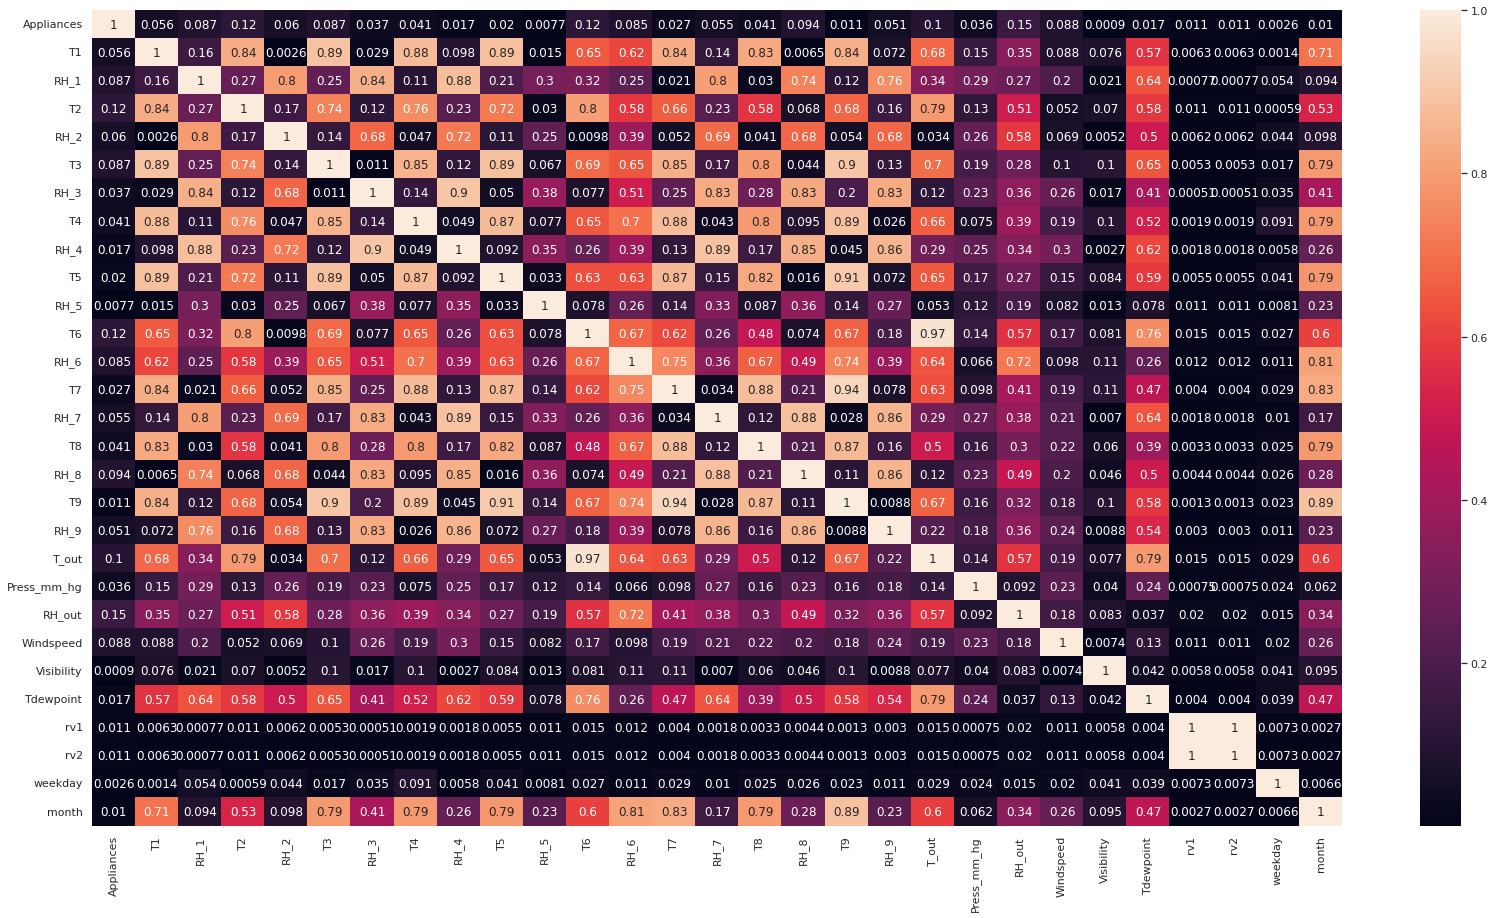

In [75]:
plt.figure(figsize=(28,15))
correlation=df_energy.corr()
sns.heatmap(abs(correlation),annot=True)

Dependent variable does not has significant correlation with independent features

In [76]:
correlation

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month
Appliances,1.000000,0.056260,0.086852,0.120899,-0.059703,0.086778,0.036595,0.041208,0.017368,0.020492,0.007651,0.119545,-0.084783,0.026714,-0.055398,0.040692,-0.093943,0.011304,-0.051061,0.100841,-0.036264,-0.153277,0.088203,-0.000895,0.016676,-0.010837,-0.010837,0.002572,-0.010138
T1,0.056260,1.000000,0.163920,0.836829,-0.002609,0.892418,-0.028602,0.876990,0.097811,0.885249,-0.014881,0.654769,-0.615054,0.838694,0.135100,0.825409,-0.006511,0.844785,0.071689,0.682841,-0.150523,-0.345487,-0.087741,-0.076079,0.571284,-0.006265,-0.006265,0.001374,0.706332
RH_1,0.086852,0.163920,1.000000,0.269787,0.797544,0.253153,0.844681,0.106075,0.880365,0.205757,0.303180,0.316114,0.245208,0.021300,0.801101,-0.030142,0.736188,0.115177,0.763999,0.340735,-0.293948,0.274149,0.204865,-0.020899,0.639110,-0.000774,-0.000774,-0.053818,-0.094135
T2,0.120899,0.836829,0.269787,1.000000,-0.165687,0.735270,0.121463,0.762060,0.231533,0.720549,0.029530,0.801234,-0.580400,0.663650,0.229161,0.578184,0.068492,0.675550,0.157309,0.792287,-0.133009,-0.505301,0.052446,-0.069637,0.582609,-0.011131,-0.011131,0.000586,0.533513
RH_2,-0.059703,-0.002609,0.797544,-0.165687,1.000000,0.137166,0.678342,-0.047434,0.721438,0.110333,0.250187,-0.009833,0.390125,-0.051548,0.690568,-0.041155,0.679759,0.054390,0.676442,0.033529,-0.255549,0.584984,0.069094,-0.005188,0.499073,0.006207,0.006207,-0.044223,-0.098105
T3,0.086778,0.892418,0.253153,0.735270,0.137166,1.000000,-0.011288,0.852773,0.122678,0.888183,-0.066507,0.686825,-0.647628,0.847364,0.172529,0.795259,0.044328,0.901305,0.134504,0.699365,-0.189840,-0.281715,-0.100918,-0.102113,0.645817,-0.005278,-0.005278,-0.017475,0.790334
RH_3,0.036595,-0.028602,0.844681,0.121463,0.678342,-0.011288,1.000000,-0.140524,0.898977,-0.050090,0.375394,0.076812,0.514975,-0.250154,0.832685,-0.283286,0.828823,-0.195336,0.833544,0.118186,-0.233281,0.356199,0.263161,0.017119,0.414392,-0.000514,-0.000514,-0.035205,-0.414440
T4,0.041208,0.876990,0.106075,0.762060,-0.047434,0.852773,-0.140524,1.000000,-0.048720,0.871816,-0.076614,0.652333,-0.703157,0.877751,0.043422,0.796242,-0.095283,0.889442,-0.025638,0.663456,-0.075208,-0.388612,-0.185862,-0.104616,0.519420,-0.001887,-0.001887,-0.091013,0.789192
RH_4,0.017368,0.097811,0.880365,0.231533,0.721438,0.122678,0.898977,-0.048720,1.000000,0.091779,0.352554,0.259022,0.392254,-0.131271,0.894303,-0.167132,0.847254,-0.044589,0.856589,0.293263,-0.250731,0.336826,0.300158,0.002728,0.616514,-0.001827,-0.001827,-0.005757,-0.258258
T5,0.020492,0.885249,0.205757,0.720549,0.110333,0.888183,-0.050090,0.871816,0.091779,1.000000,0.032720,0.629142,-0.632369,0.870620,0.148857,0.824972,0.016337,0.911066,0.072255,0.651301,-0.170934,-0.273944,-0.145083,-0.084070,0.588334,-0.005531,-0.005531,-0.040809,0.785879
